In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import operator

from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from pyspark.sql.functions import *

nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/andra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
tweets = pd.read_csv("tweets.csv", sep = ";", error_bad_lines = False, encoding = 'utf8')
tweets = tweets.fillna(0)
tweets


,username,date,retweets,favorites,text,tokens,geo,location,mentions,hashtags,id,query,permalink,grade
0,NS_online,2017-01-17 18:21,0,0,"Oei, dat is balen Melcher! Sorry voor de verkeerde info. Hoeveel vertraging heb je hierdoor opgelopen? ^SC","['Oei', ',', 'dat', 'is', 'balen', 'Melcher', '!', 'Sorry', 'voor', 'de', 'verkeerde', 'info', '.', 'Hoeveel', 'vertraging', 'heb', 'je', 'hierdoor', 'opgelopen', '?', '^SC']",0,Utrecht,0,0,821392093541240832,NS AND vertraging,https://twitter.com/NS_online/status/821392093541240832,3
1,Arriva_NL,2017-12-11 16:14,0,0,"Ik zie dat de voorgaande rit wel heeft gereden, maar met 3 kwartier vertraging is aangekomen. Hopelijk komt de bus snel langs! ^Nina","['Ik', 'zie', 'dat', 'de', 'voorgaande', 'rit', 'wel', 'heeft', 'gereden', ',', 'maar', 'met', '3', 'kwartier', 'vertraging', 'is', 'aangekomen', '.', 'Hopelijk', 'komt', 'de', 'bus', 'snel', 'langs', '!', '^Nina']",0,Heerenveen,0,0,940223278093864960,Arriva AND vertraging,https://twitter.com/Arriva_NL/status/940223278093864960,3
2,NS_online,2017-12-06 08:37,0,0,"Ah, oke! Dat was mij niet zo snel duidelijk. Natuurlijk doen we ons best om de treinen altijd op de aangegeven tijd te laten vertrekken. Als dit niet gebeurt, onze excuses daarvoor. In dit geval denk ik dat het dan echt te maken heeft met storingen en het weer. Het kan 1/2","['Ah', ',', 'oke', '!', 'Dat', 'was', 'mij', 'niet', 'zo', 'snel', 'duidelijk', '.', 'Natuurlijk', 'doen', 'we', 'ons', 'best', 'om', 'de', 'treinen', 'altijd', 'op', 'de', 'aangegeven', 'tijd', 'te', 'laten', 'vertrekken', '.', 'Als', 'dit', 'niet', 'gebeurt', ',', 'onze', 'excuses', 'daarvoor', '.', 'In', 'dit', 'geval', 'denk', 'ik', 'dat', 'het', 'dan', 'echt', 'te', 'maken', 'heeft', 'met', 'storingen', 'en', 'het', 'weer', '.', 'Het', 'kan', '1/2']",0,Utrecht,0,0,938296392891629569,storingen,https://twitter.com/NS_online/status/938296392891629569,1
3,Nyderwin,2017-01-12 08:21,0,0,zal de trein van 38 na op tijd rijden of zal die ook vertraging hebben,"['zal', 'de', 'trein', 'van', '38', 'na', 'op', 'tijd', 'rijden', 'of', 'zal', 'die', 'ook', 'vertraging', 'hebben']",0,belgium,0,0,819429046970937345,vertraging AND trein,https://twitter.com/Nyderwin/status/819429046970937345,2
4,RETRotterdam,2017-12-13 08:08,1,0,Actuele #RETverstoring #Bus143 Vervallen rit. Oponthoud . Meer info op,"['Actuele', '#', 'RETverstoring', '#', 'Bus143', 'Vervallen', 'rit', '.', 'Oponthoud', '.', 'Meer', 'info', 'op']",0,Rotterdam,0,#RETverstoring #Bus143,940825630022754304,Overstappen OR Omleiding OR oponthoud,https://twitter.com/RETRotterdam/status/940825630022754304,2
5,ElsVeenis,2017-01-17 17:00,0,0,"Na heenweg naar werk vol ontberingen (kou, vertraging , staan) nu terug met sprinters -duurt lang, geen wifi, maar warm, rustig zitten #ns","['Na', 'heenweg', 'naar', 'werk', 'vol', 'ontberingen', '(', 'kou', ',', 'vertraging', ',', 'staan', ')', 'nu', 'terug', 'met', 'sprinters', '-duurt', 'lang', ',', 'geen', 'wifi', ',', 'maar', 'warm', ',', 'rustig', 'zitten', '#', 'ns']",0,Ministerie OCW,0,#ns,821371520564002816,NS AND vertraging,https://twitter.com/ElsVeenis/status/821371520564002816,3
6,LeanderrJ,2017-12-15 19:42,0,1,Na drie keer overstappen de afgelopen 4 jaar weet ik: je gaat nooit tevreden zijn. Uiteindelijk wel weer naar T-Mobile tho,"['Na', 'drie', 'keer', 'overstappen', 'de', 'afgelopen', '4', 'jaar', 'weet', 'ik', ':', 'je', 'gaat', 'nooit', 'tevreden', 'zijn', '.', 'Uiteindelijk', 'wel', 'weer', 'naar', 'T-Mobile', 'tho']",0,0,0,0,941725131369480192,Overstappen OR Omleiding OR oponthoud,https://twitter.com/LeanderrJ/status/941725131369480192,1
7,WilCornielje,2017-12-17 14:47,0,0,Ja @he_peter dat zie je goed. En vervolgens snel weer de linkse politici van de VS ophemelen. Volstrekt scheve journalistiek. Overstappen naar #@fvdemocratie,"['Ja', '@', 'he_peter', 'dat', 'zie', 'je', 'goed', '.', 'En', 'vervolgens', 'snel', 'weer', 'de', 'linkse', 'politici', 'van', 'de', 'VS', 'ophemelen', '.', 'Volstrekt', 'scheve', 'jou

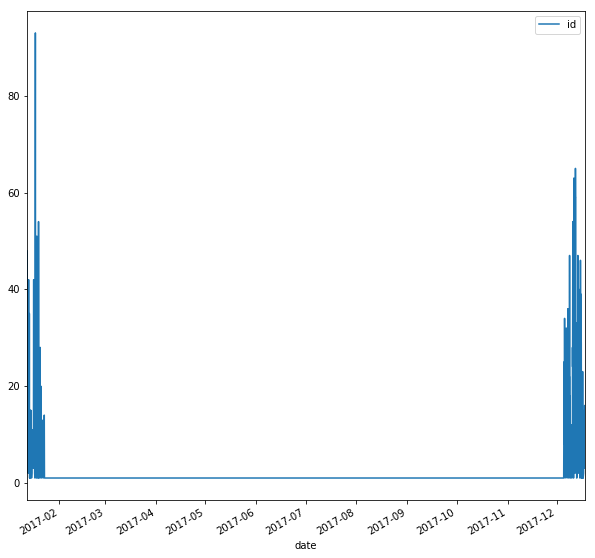

In [22]:
tweets["date"] = pd.to_datetime(tweets["date"])

dates = pd.DataFrame()
dates["id"] = tweets["id"]
dates["date"] = tweets["date"].dt.round('h')

dates.groupby(dates["date"]).count().plot(figsize = (10, 10))
# ax = plt.subplot()
# ax.set_xlim(pd.Timestamp('2017-12-10'), pd.Timestamp('2017-12-12'))
plt.show()
# dates

In [24]:
tweets['location'] = tweets['location'].str.strip()
tweets_loc = tweets.groupby(tweets.location).count()['id'].sort_values(ascending=False)
tweets_loc
# df.groupby([df.created_at.dt.month,'product_version']).count()['Id'].reset_index(1)

location
Utrecht                         1028
Amsterdam                       575 
Nederland                       388 
Heerenveen                      366 
Den Haag                        222 
Rotterdam                       158 
Hilversum                       104 
Brussel                         102 
Netherlands                     98  
The Netherlands                 98  
Amsterdam, Nederland            95  
Den Haag, Nederland             67  
Groningen                       50  
België                          42  
Utrecht, Nederland              38  
Belgium                         36  
Terneuzen, Nederland            25  
followback in 48 uur            22  
everywhere                      22  
Groningen, Nederland            21  
Brussels, Belgium               20  
the Netherlands                 19  
Amsterdam, The Netherlands      19  
Tilburg                         18  
Rotterdam, Nederland            18  
Amersfoort                      17  
Nijmegen                     

In [77]:
# tokenized_sents = [word_tokenize(i["text"]) for i in tweets]

# tweets['text'].apply(word_tokenize)

# tweets.apply(lambda row: word_tokenize(row['text']))
# def robust_encode(bs):
#     try:
#         return bs.encode('utf8')
#     except UnicodeEncodeError:
#         return ''
# tweets.apply(lambda row: word_tokenize(row['text']), axis=1, ignore_failures = True)

In [44]:
common_words_file = open('common_words.txt')
common_words = common_words_file.read().split(',')
# common_words

In [45]:
occ = {}
def countOcc(words):
    for word in words[1:-1].split(','):
        word = word.strip()[1:-1].encode('utf8').lower()
        if word not in common_words:
            if word not in occ:
                occ[word] = 1
            else:
                occ[word] += 1

In [46]:
a = tweets.apply(lambda row: countOcc(row['tokens']), axis=1)
# tweets.apply(lambda row: print(row['tokens']), axis=1)

sorted_x = sorted(occ.items(), key=operator.itemgetter(1), reverse=True)
# sorted_x

In [47]:
all_text = ""
for word in sorted_x:
    if int(word[1]) > 50:
        for i in range(int(word[1])):
            all_text += word[0] + " "


In [48]:
# text = ""
# with open("most_common.txt") as f:
#     lines = f.readlines()
# for l in lines:
#     line = l.split(" ")
#     for i in range(int(line[0])):
#         text += line[1][:-1] + " "
        
wordCloud = WordCloud(width=2000, height=1000, background_color='white').generate(all_text).to_file("word_cloud2.png")
# wordCloud = WordCloud(width=2000, height=1000, background_color='white').generate(tweets_loc).to_file("word_cloud3.png")

TypeError: expected string or buffer

In [28]:
df = sqlContext.read.csv('tweets.csv', sep = ';', header = True, inferSchema = True)
sqlContext.registerDataFrameAsTable(df, 'tweets')
#df.printSchema()
#df.toPandas()
disr = sqlContext.read.csv('disruption_grade.csv', sep = ';', header = True, inferSchema = True)

round_date = (round(unix_timestamp(col('date'), format='yyyy-MM-dd HH:mm') / 3600) * 3600).cast('integer')

df = df.withColumn('round_date', round_date)

pd.set_option('display.max_colwidth', -1)
df.select('text').where('grade is null').toPandas()

,text


In [29]:
mldf = df.select(['round_date', 'grade']).groupby(['round_date', 'grade']).count().orderBy('round_date')
mldf = mldf.withColumn('hour', hour(from_unixtime('round_date')))
mldf.toPandas()

,round_date,grade,count,hour
0,1484197200,0,3,7
1,1484200800,0,18,8
2,1484204400,0,48,9
3,1484208000,0,45,10
4,1484211600,0,32,11
5,1484215200,0,13,12
6,1484218800,0,14,13
7,1484222400,0,13,14
8,1484226000,0,12,15
9,1484229600,0,13,16


In [36]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

features = ['count', 'hour']
vect = VectorAssembler(inputCols = features, outputCol = 'features')
pipeline = Pipeline(stages = [vect])
data = pipeline.fit(mldf).transform(mldf).cache()
(training, test) = data.randomSplit([0.6, 0.1], seed = 42)
print training.count()

464


In [16]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

def evaluate(test, prediction):
    ev = MulticlassClassificationEvaluator(labelCol = 'grade', predictionCol = 'prediction')
    print '%f' % ev.evaluate(prediction)

In [34]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

def evaluate(test, prediction):
    ev = BinaryClassificationEvaluator(labelCol = 'grade', rawPredictionCol = 'rawPrediction')
    print '%f' % ev.evaluate(prediction)

In [37]:
from pyspark.ml.classification import RandomForestClassifier as rfc

result = rfc(labelCol = 'grade', featuresCol = 'features', numTrees = 100, maxDepth = 5)
model = result.fit(training)
evaluate(test, model.transform(test))

0.589744


In [37]:
predictions = model.transform(data)

predictions.toPandas()

# plot de predictions.grade si predictions.prediction 

,round_date,grade,count,hour,features,rawPrediction,probability,prediction
0,1512432000,1,2,2,"[2.0, 2.0]","[0.0, 23.6652948256, 17.7378517998, 8.59685337...","[0.0, 0.473305896511, 0.354757035995, 0.171937...",1.0
1,1512435600,1,1,3,"[1.0, 3.0]","[0.0, 23.4135475598, 10.9171302995, 15.6693221...","[0.0, 0.468270951196, 0.218342605989, 0.313386...",1.0
2,1512439200,1,1,4,"[1.0, 4.0]","[0.0, 22.181762678, 11.4927297001, 16.3255076219]","[0.0, 0.44363525356, 0.229854594001, 0.3265101...",1.0
3,1512442800,1,1,5,"[1.0, 5.0]","[0.0, 18.1064220182, 12.2137732723, 19.6798047...","[0.0, 0.362128440364, 0.244275465445, 0.393596...",3.0
4,1512453600,1,12,8,"[12.0, 8.0]","[0.0, 25.1227746048, 17.2706576171, 7.6065677781]","[0.0, 0.502455492097, 0.345413152341, 0.152131...",1.0
5,1512457200,1,22,9,"[22.0, 9.0]","[0.0, 30.2316699368, 13.0202599802, 6.74807008...","[0.0, 0.604633398735, 0.260405199604, 0.134961...",1.0
6,1512460800,1,29,10,"[29.0, 10.0]","[0.0, 29.9568896475, 15.3084357724, 4.7346745801]","[0.0, 0.59913779295, 0.306168715448, 0.0946934...",1.0
7,1512464400,1,19,11,"[19.0, 11.0]","[0.0, 33.4242503287, 12.8998349706, 3.67591470...","[0.0, 0.668485006574, 0.257996699412, 0.073518...",1.0
8,1512468000,1,14,12,"[14.0, 12.0]","[0.0, 33.8312330447, 11.5325532142, 4.6362137411]","[0.0, 0.676624660895, 0.230651064283, 0.092724...",1.0
9,1512471600,1,15,13,"[15.0, 13.0]","[0.0, 31.5054721802, 14.7663291455, 3.72819867...","[0.0, 0.630109443605, 0.295326582909, 0.074563...",1.0
